!['title'](ml_map.png)

#### Sklearn
- Build machine learning models to make predictions or learn patterns within the data and evaluate those predictions 
- It has many in-built ML models

#### Workflow:
1. Get data ready
2. Pick a model (to suit the problem)
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentations
6. Save and reload your trained model

In [1]:
import sklearn

In [2]:
sklearn.show_versions()


System:
    python: 3.12.2 | packaged by Anaconda, Inc. | (main, Feb 27 2024, 17:28:07) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\saurabh\Downloads\Practice\Python\conda_env\python.exe
   machine: Windows-11-10.0.22621-SP0

Python dependencies:
      sklearn: 1.3.0
          pip: 23.3.1
   setuptools: 68.2.2
        numpy: 1.26.4
        scipy: 1.12.0
       Cython: None
       pandas: 2.2.1
   matplotlib: 3.8.0
       joblib: 1.2.0
threadpoolctl: 2.2.0

Built with OpenMP: True

threadpoolctl info:
       filepath: C:\Users\saurabh\Downloads\Practice\Python\conda_env\Library\bin\mkl_rt.2.dll
         prefix: mkl_rt
       user_api: blas
   internal_api: mkl
        version: 2023.1-Product
    num_threads: 10
threading_layer: intel

       filepath: C:\Users\saurabh\Downloads\Practice\Python\conda_env\vcomp140.dll
         prefix: vcomp
       user_api: openmp
   internal_api: openmp
        version: None
    num_threads: 12


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
heart_disease = pd.read_csv('heart-disease.csv')

In [4]:
heart_disease.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
237,60,1,0,140,293,0,0,170,0,1.2,1,2,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1


In [5]:
heart_disease.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Create X (feature matrix)
X = heart_disease.drop('target',axis=1)
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [7]:
# Create y (labels)
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [8]:
# Choose the right model and hyper-parameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

# Keep the default parameters here
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

##### Fit the model to the training data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2) # test_size=0.2 => 80% data is used for training, 20% for testing

In [10]:
clf.fit(X_train,y_train);

In [11]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
174,60,1,0,130,206,0,0,132,1,2.4,1,2,3
192,54,1,0,120,188,0,1,113,0,1.4,1,1,3
98,43,1,2,130,315,0,1,162,0,1.9,2,1,2


##### Make predictions

In [12]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3


In [13]:
y_preds = clf.predict(X_test) # prediction can be done on data which looks similar  shpae to train so X_test

In [14]:
y_preds

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1], dtype=int64)

In [15]:
y_test

156    1
124    1
101    1
32     1
33     1
      ..
131    1
247    0
159    1
190    0
99     1
Name: target, Length: 61, dtype: int64

##### Evaluate the model

In [16]:
clf.score(X_train, y_train) # Result on training data

1.0

In [17]:
clf.score(X_test,y_test) # Result on test data

0.8032786885245902

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.86      0.86      0.86        42

    accuracy                           0.80        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.80      0.80      0.80        61



In [19]:
confusion_matrix(y_test,y_preds)

array([[13,  6],
       [ 6, 36]], dtype=int64)

In [20]:
accuracy_score(y_test, y_preds)

0.8032786885245902

##### Improve a model

In [21]:
# Try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f'Model accuracy on test data set:{clf.score(X_test,y_test)*100:2f}%')
    print("")

Trying model with 10 estimators...
Model accuracy on test data set:83.606557%

Trying model with 20 estimators...
Model accuracy on test data set:80.327869%

Trying model with 30 estimators...
Model accuracy on test data set:83.606557%

Trying model with 40 estimators...
Model accuracy on test data set:80.327869%

Trying model with 50 estimators...
Model accuracy on test data set:80.327869%

Trying model with 60 estimators...
Model accuracy on test data set:78.688525%

Trying model with 70 estimators...
Model accuracy on test data set:80.327869%

Trying model with 80 estimators...
Model accuracy on test data set:80.327869%

Trying model with 90 estimators...
Model accuracy on test data set:83.606557%



##### Save a model and load it

In [22]:
import pickle
pickle.dump(clf,open('random_forest_model1.pkl','wb'))

In [23]:
loaded_model = pickle.load(open('random_forest_model1.pkl','rb'))
loaded_model.score(X_test,y_test)

0.8360655737704918

#### Getting our data ready 
Three main things we have to do:
1. Split the data into features and labels (Usually `X` and `y`)
2. Filling (also called <b>imputing</b>) or disregarding missing values
3. Converting non-numerical values to numerical values (also called <b>Feature Encoding</b>)

In [24]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
X = heart_disease.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [26]:
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

##### Splitting the data into training and test sets

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [29]:
X.shape

(303, 13)

In [30]:
len(heart_disease)

303

In [31]:
X.shape[0]*0.8

242.4

##### Clean Data -> Transform Data -> Reduce Data

### 1.1 Make sure it's all numerical

In [32]:
car_sales = pd.read_csv('car-sales.csv')

In [33]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [34]:
len(car_sales)

1000

In [35]:
# Split the data into X/y
X = car_sales.drop('Price',axis=1)
y = car_sales['Price']

In [36]:
# Splitting into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [37]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X_train,y_train)

model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [38]:
# ML models can't deal with strings so we need to convert them into integers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [39]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [40]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


![OneHotEncoding.png](OHE.png)

In [41]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,False,True,False,False,False,False,False,False,True
1,5,True,False,False,False,False,True,False,False,False
2,4,False,True,False,False,False,False,False,False,True
3,4,False,False,False,True,False,False,False,False,True
4,3,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
995,4,False,False,False,True,True,False,False,False,False
996,3,False,False,True,False,False,False,False,False,True
997,4,False,False,True,False,False,True,False,False,False
998,4,False,True,False,False,False,False,False,False,True


In [42]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor()

In [43]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there were missing values?
- Fill them with some value (also known as imputation)
- Remove the samples with missing data altogether

In [44]:
car_sales_missing = pd.read_csv('car_sales_missing_data.csv')

In [45]:
car_sales_missing.sample(5)

,Make,Colour,Odometer (KM),Doors,Price
868,NaN,White,45513.0,5.0,38984.0
821,Nissan,Red,124112.0,4.0,7217.0
382,NaN,White,103728.0,4.0,7061.0
584,BMW,White,96224.0,NaN,45720.0
562,Toyota,White,NaN,4.0,14021.0


In [46]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [48]:
# Let's try to convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [49]:
X

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [50]:
y.isna().sum()

50

##### Yes, you can perform hot encoding on data with NaN values. However, there are a few things to keep in mind:
- NaN values will be encoded as a separate category. This means that your one-hot encoded dataframe will have an extra column for NaN values.
- You may need to impute the NaN values before performing hot encoding. This is because some machine learning algorithms cannot handle NaN values.
- You should be careful not to overfit your model to the NaN values. This can happen if you have a lot of NaN values in your data.ta.

##### Option 1: Fill missing data with Pandas

In [51]:
car_sales_missing['Make'] = car_sales_missing['Make'].fillna('missing')
car_sales_missing['Colour'] = car_sales_missing['Colour'].fillna('missing')
car_sales_missing['Odometer (KM)'] = car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean())
car_sales_missing['Doors'] = car_sales_missing['Doors'].fillna(4)

In [52]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [53]:
car_sales_missing.dropna(inplace=True)

In [54]:
len(car_sales_missing)

950

In [55]:
# Create X and y
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [56]:
# Let's try to convert our data into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

##### Option 2: Fill missing data with Scikit-Learn

In [57]:
car_sales_missing = pd.read_csv('car_sales_missing_data.csv')
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [58]:
car_sales_missing.dropna(subset=['Price'],inplace=True)

In [59]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [60]:
# Split into X and y
X = car_sales_missing.drop('Price',axis=1)
y = car_sales_missing['Price']

In [61]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [62]:
# Fill missing values with sklean
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant',fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make','Colour']
door_feature = ['Doors'] 
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer(
    [
        ('cat_imputer',cat_imputer,cat_features),
        ('door_imputer',door_imputer,door_feature),
        ('num_imputer',num_imputer,num_features),
    ]
)

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [63]:
car_sales_filled = pd.DataFrame(filled_X, columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled.sample(5)

,Make,Colour,Doors,Odometer (KM)
603,Toyota,Blue,4.0,95993.0
571,Honda,Blue,4.0,223005.0
382,Toyota,Blue,4.0,130987.447894
318,Toyota,Blue,4.0,232912.0
61,Honda,Black,4.0,16933.0


In [64]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make','Colour','Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [66]:
# Now we have got our data as numbers and filled (no missing values)
# Let's fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.21990196728583944

In [67]:
len(car_sales_filled), len(car_sales)

(950, 1000)

### 2. Choosing the right estimator/algorithm for our problem
Scikit-Learn uses estimator as another term for machine learning model or algorithm
- <b>Classification</b> : Predicting whether a sample is one thing or another
- <b>Regression</b> : Predicting a number

#### 2.1 Picking a machine learning model for a regression problem

In [68]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [69]:
California_df = pd.DataFrame(housing['data'],columns=housing.feature_names)
California_df.sample(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
20111,3.4838,30.0,7.206061,1.545455,446.0,2.703030,37.80,-120.20
7826,3.5972,26.0,5.000000,1.097902,1150.0,2.680653,33.90,-118.14
3820,2.6957,23.0,3.667954,1.111969,2249.0,2.894466,34.20,-118.48
9594,3.2852,17.0,5.535326,1.060688,2950.0,2.672101,37.33,-120.46
5320,4.8304,38.0,5.216649,1.201708,1698.0,1.812166,34.05,-118.42


In [70]:
California_df['target'] = pd.Series(housing['target'])
California_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [71]:
California_df.shape

(20640, 9)

In [72]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = California_df.drop('target',axis=1)
y = California_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initiate Ridge model
model = Ridge()
model.fit(X_train,y_train)

model.score(X_test,y_test)

0.5758549611440126

##### How do we improve this score?
##### What if Ridge wasn't working?
Map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

- <b>Ensemble methods</b> combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.
- Two very famous examples of ensemble methods are:
   1. Gradient-boosted trees
   2. Random forests.

In [73]:
# Let's try the RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = California_df.drop('target',axis=1)
y = California_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initiate RandomForestRegressor model
clf = RandomForestRegressor()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8065734772187598

In [74]:
model.score(X_test,y_test)

0.5758549611440126

#### 2.2 Choosing an estimator for a classification problem
Let's go to the map : https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [75]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
len(heart_disease)

303

In [77]:
# Let's try linear SVC
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initiate RandomForestClassifier model
clf = LinearSVC()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

C:\Users\saurabh\Downloads\Practice\Python\conda_env\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\saurabh\Downloads\Practice\Python\conda_env\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8688524590163934

In [78]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [243]:
# Let's try the RandomForest Classifier 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initiate RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

#### Tidbit:
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning 

### 3. Fit the model/algorithm on our data and use it to make predictions
#### 3.1 Fitting the model to the data
Different names for:
- X = features, features variables, data
- y = labels, targets, target variables

In [80]:
# Let's try the RandomForest Classifier 
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initiate RandomForestClassifier model
clf = RandomForestClassifier()
clf.fit(X_train,y_train)

clf.score(X_test,y_test)

0.8524590163934426

In [81]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [82]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

In [83]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


#### 3.2 Make predictions using a machine learning model
2 Ways to make predictions:
1. `predict()`
2. `predict_proba()`

In [84]:
# Using a trained model to make predictions
clf.predict(np.array([1,4,6,8,5])) # this doesn't work

C:\Users\saurabh\Downloads\Practice\Python\conda_env\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 4. 6. 8. 5.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [85]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [86]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [87]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [88]:
# Compare predictions to truth labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

In [90]:
clf.score(X_test,y_test)

0.8524590163934426

Make predictions with `predict_proba()`
- predict_proba() returns probabilities of a classification 

In [91]:
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [92]:
# Let's predict() on the same data
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

In [93]:
heart_disease['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

`predict()` can also be used for regression model

In [94]:
# Let's try the RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = California_df.drop('target',axis=1)
y = California_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initiate RandomForestRegressor model
model = RandomForestRegressor().fit(X_train,y_train)

# Make Predictions
y_preds = model.predict(X_test)

In [95]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [96]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [97]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.32659871732073664

### 4. Evaluating the machine learning model
https://scikit-learn.org/stable/modules/model_evaluation.html

- Three ways to evaluate Scikit-Learn models/estimators:
  1. Estimator `Score` method
  2. The `scoring` parameter
  3. Problem-specific `metric function`

#### 4.1 Evaluating a model with the `score` method

In [100]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [103]:
clf.score(X_train, y_train)

1.0

In [104]:
clf.score(X_test, y_test)

0.8524590163934426

#### 4.2 Evaluating a model with the `scoring` method

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train);

In [110]:
clf.score(X_test,y_test)

0.8524590163934426

In [113]:
cross_val_score(clf,X,y,cv=5) #cv=nth cross-validation

array([0.81967213, 0.90163934, 0.80327869, 0.81666667, 0.75      ])

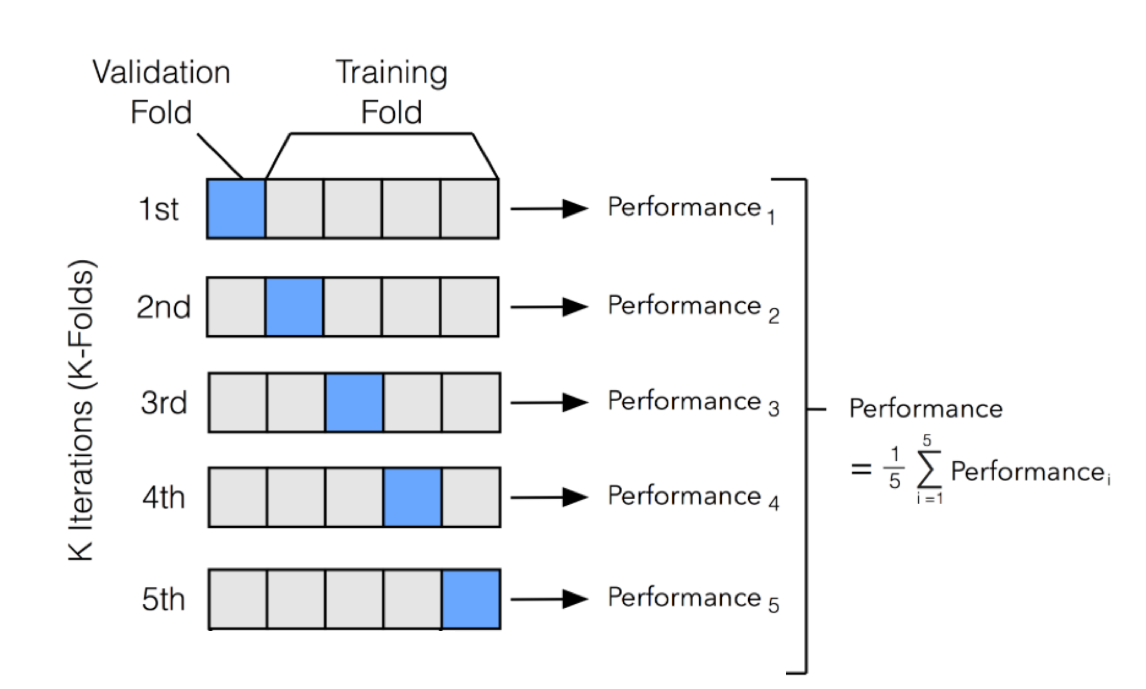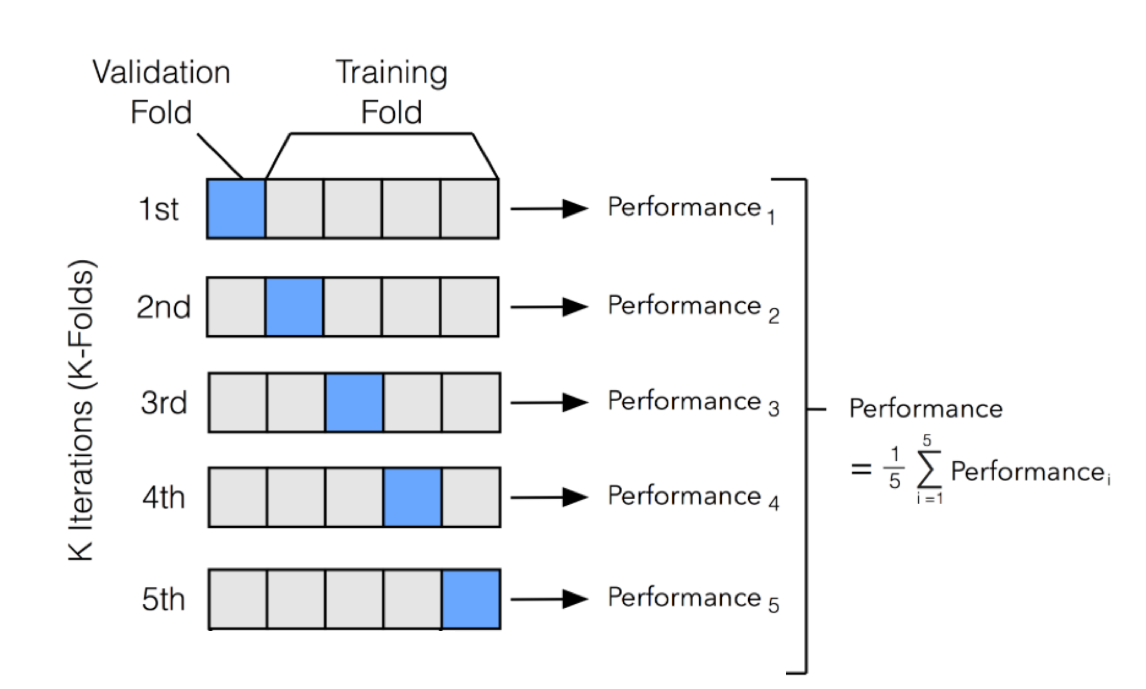

In [116]:
cross_val_score(clf,X,y,cv=10)

array([0.87096774, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [117]:
np.random.seed(42)

clf_single_score = clf.score(X_test,y_test)
clf_cross_val_score = cross_val_score(clf,X,y,cv=5).mean()

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [121]:
# The default scoring parameter of classifier = Mean accuracy

In [122]:
# Scoring parameter is set to None by default
cross_val_score(clf,X,y,cv=5,scoring = None)

array([0.81967213, 0.86885246, 0.80327869, 0.76666667, 0.8       ])

#### 4.2.1 Classification model evaluation metrics
    1. Accuracy 
    2. Area under ROC Curve
    3. Confusion matrix
    4. Classification report

##### Accuracy 

In [123]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf,X,y,cv=5)

In [124]:
np.mean(cross_val_score)

0.8248087431693989

In [125]:
print(f'Heart Disease Classifier Cross_Validated Accuracy: {np.mean(cross_val_score)*100:2f}%')

Heart Disease Classifier Cross_Validated Accuracy: 82.480874%


**Area under Receiver Operating Characteristics Curve (AUC/ROC)**
- Area Under Curve
- ROC Curve

ROC curves are a comparison of a model's true positive rate (TPR) versus a model false positive rate (FPR)

* True Positive = Model predicts 1 when truth is 1
* False Positive = Model predicts 1 when truth is 0
* True negative = Model predicts 0 when truth is 0
* False negative = Model predicts 0 when truth is 1

In [126]:
# Create X_test....etc.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [128]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(X_train,y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.58, 0.42],
        [0.09, 0.91],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.52, 0.48],
        [0.09, 0.91],
        [0.3 , 0.7 ],
        [0.98, 0.02],
        [0.14, 0.86],
        [0.39, 0.61]]),
 61)

In [209]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.42, 0.91, 0.45, 0.25, 0.48, 0.91, 0.7 , 0.02, 0.86, 0.61])

In [210]:
# Calculating fpr,tpr, and thresholds
fpr,tpr,thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.10344828,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.27586207,
       0.27586207, 0.31034483, 0.34482759, 0.34482759, 0.44827586,
       0.44827586, 0.51724138, 0.5862069 , 0.5862069 , 0.75862069,
       0.89655172, 0.93103448, 1.        ])

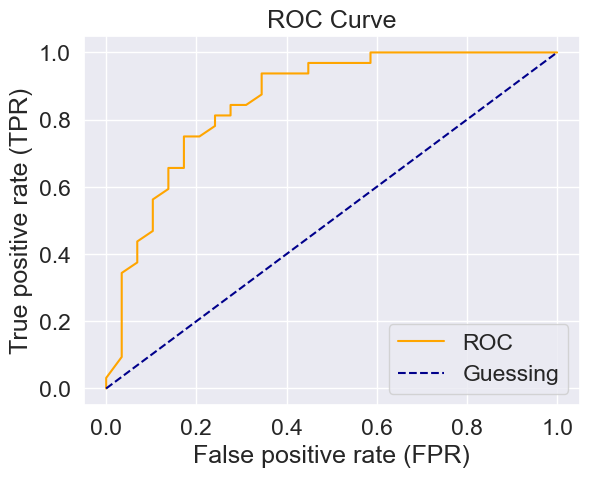

In [211]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
    '''
        Plots a ROC curve given the FPR and TPR of a model.
    '''
    # Plot ROC curve
    plt.plot(fpr,tpr,color='orange',label='ROC')

    # Plot line with no predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue', linestyle='--',label='Guessing')

    # Customize the plot
    plt.xlabel("False positive rate (FPR)")
    plt.ylabel('True positive rate (TPR)')
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
plot_roc_curve(fpr,tpr)    

In [212]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8561422413793104

- **FPR** = FP/(FN+TN)
- **TPR** = TP/(TP+FN)
- FPR and TPR depends on **threshold** because threshold decides TP,TN,FP,and FN

In [213]:
fpr,tpr,threshold = roc_curve(y_test,y_test)
roc_df = pd.DataFrame(zip(fpr,tpr,threshold),columns=['FPR','TPR','THRESHOLD'])
roc_df # Positive infinity is represented by the constant float('inf')

,FPR,TPR,THRESHOLD
0,0.0,0.0,inf
1,0.0,1.0,1.0
2,1.0,1.0,0.0


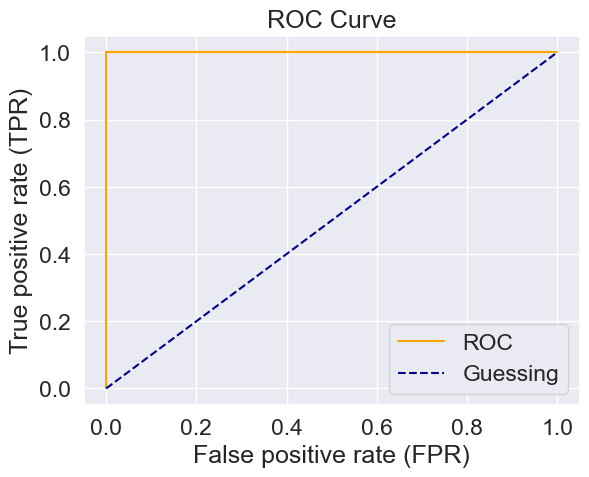

In [214]:
# Plot perfect ROC curve and AUC score
fpr,tpr,threshold = roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [215]:
# Perfect AUC Score
roc_auc_score(y_test,y_test)

1.0

##### Confusion Matrix

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving the idea of where the model is getting confused.

In [216]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 8, 24]], dtype=int64)

In [217]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,y_preds, rownames=['Actual Labels'],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,24,5
1,8,24


In [218]:
24+5+8+24

61

In [219]:
len(y_preds)

61

In [220]:
len(X_test)

61

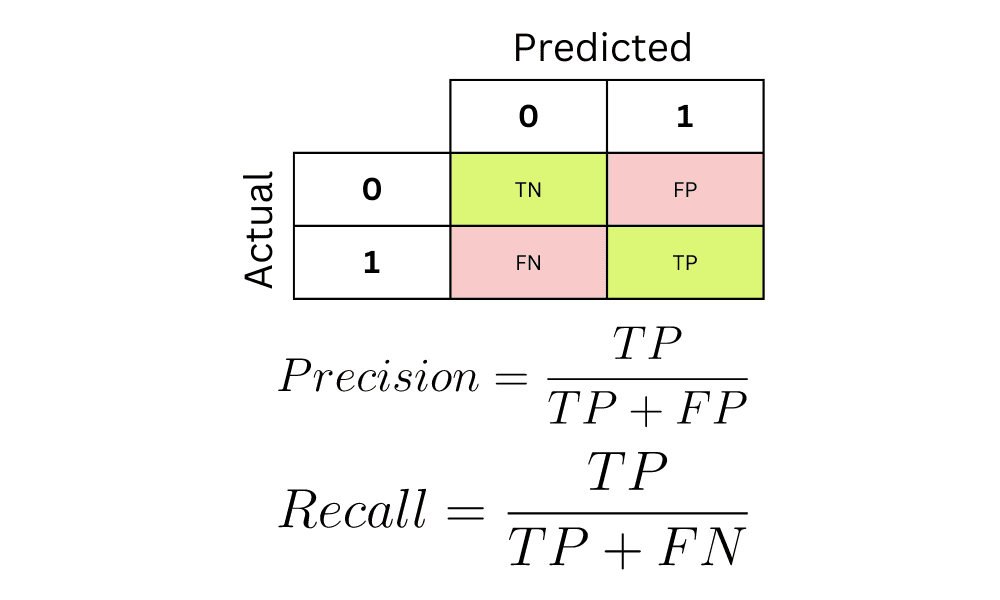

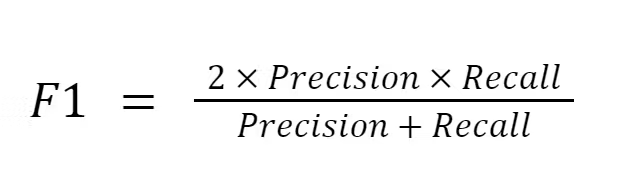

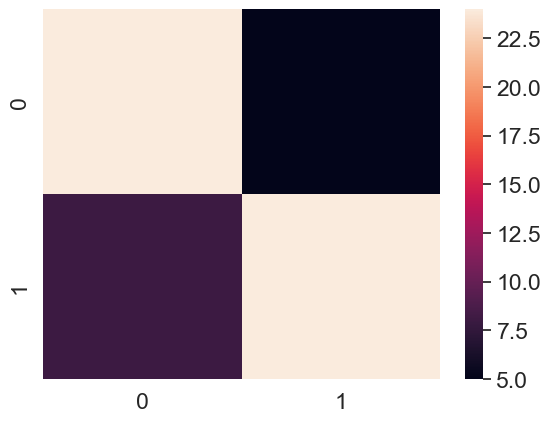

In [221]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);

In [222]:
# !conda install --yes --prefix {sys.prefix} seaborn

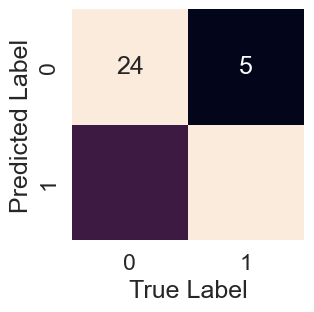

In [223]:
def plot_conf_mat(conf_mat):
    '''
        Plots a confusion matrix using Seaborn's heatmap()
    '''
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    plt.xlabel('True Label');
    plt.ylabel('Predicted Label');

plot_conf_mat(conf_mat)

**Classification Report**

In [224]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79        29
           1       0.83      0.75      0.79        32

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [225]:
29+32

61

- **F1** = Defined as the harmonic mean of precision and recall. A perfect model achieves an F1 score of 1.0
- **Support** = The number of samples each metric was calculated on.
- **Macro Avg** = The avg. precision, recall and F1 score between classes.
- **Weighted Avg** = The weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated w.r.t. how many samples there are in each class.

In [226]:
# Building TP, TN, FP, FN function
def compute_tp_tn_fn_fp(y_act, y_pred):
    '''
        * True Positive = Model predicts 1 when truth is 1
        * False Positive = Model predicts 1 when truth is 0
        * True negative = Model predicts 0 when truth is 0
        * False negative = Model predicts 0 when truth is 1
    '''
    tp=sum((y_act==1) & (y_pred==1))
    tn=sum((y_act==0) & (y_pred==0))
    fp=sum((y_act==1) & (y_pred==0))
    fn=sum((y_act==0) & (y_pred==1))
    return tp,tn,fp,fn

In [227]:
# Calling our function
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(y_test,y_preds) 
print('TP is:',tp_lr)
print('TN is:',tn_lr)
print('FP is:',fp_lr)
print('FN is:',fn_lr)

TP is: 24
TN is: 24
FP is: 8
FN is: 5


In [228]:
# Using sklearn to calculate TP, TN, FP, FN

from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

tn1, fp1, fn1, tp1 = confusion_matrix(y_test,y_preds).ravel()
print('TP is:',tp1)
print('TN is:',tn1)
print('FP is:',fp1)
print('FN is:',fn1)

TP is: 24
TN is: 24
FP is: 5
FN is: 8


In [229]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test,y_preds)

array([[24,  5],
       [ 8, 24]], dtype=int64)

In [230]:
# Building function to compute accuracy
def compute_accuracy(tp,tn,fp,fn):
    '''
        Accuracy = TP + TN / FP + FN + TP + TN
    '''
    return ((tp+tn)*100/float(tp+tn+fp+fn))

In [231]:
print("Accuracy is:", compute_accuracy(tp1,tn1,fp1,fn1))

Accuracy is: 78.68852459016394


In [232]:
from sklearn.metrics import accuracy_score
print("Accuracy calculation from Scikit-Learn module:",100*accuracy_score(y_test,y_preds))

Accuracy calculation from Scikit-Learn module: 78.68852459016394


In [239]:
import warnings
warnings.filterwarnings('ignore')

In [240]:
# Where precision and recall becomes valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


#### 4.2.2 Regression model evaluation metrics
    1. R^2 (pronounced as r-squared) or coefficient of determination 
    2. Mean absolute error (MAE)
    3. Mean squared error (MSE)

**R^2**: Goodness of fit
**What R-squared does**: 
- Compares -> <b>models prediction</b> to **the mean of the targets**.
- Values can range from negative infinity (a very poor model) to 1.
- **R^2 -> 1** ✅(Good); **R^2 -> 0** ❌(Bad); **R^2 -> Negative** 💀(Blunder)

![r-squared.jpg](r-squared.jpg)

In [245]:
# Let's try the RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = California_df.drop('target',axis=1)
y = California_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initiate RandomForestRegressor model
model = RandomForestRegressor().fit(X_train,y_train);

In [247]:
model.score(X_test,y_test)

0.8065734772187598

In [249]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [251]:
y_test.mean()

2.0550030959302323

In [254]:
r2_score(y_test,y_test_mean) # R^2 = 0 : When error made by mean line is equal to error made by the regression model line

0.0

In [255]:
r2_score(y_test,y_test) # R^2 = 1 : When the regression model line is perfect

1.0

**R^2 is negative means the regression model line is performing even worse than the mean line**
- **Meanings of R^2 = 0.80** => 80% of the variations in the dependent variable can be explained by the variations in the independent variable, rest 20% we don't know(it's just luck).
- Example: Imagine you're analyzing the relationship between advertising spending (independent variable) and sales (dependent variable). An R-squared of 0.80 in this case would mean that 80% of the changes you see in sales can be explained by changes in advertising spending. There's a clear connection - as advertising spending increases, sales tend to increase as well.

**MAE**: Mean Absolute Error
- Unit of output/predict is same as MAE
- Robust to outlayers
- Disadvantage: Modulus graph -> not differentiable at zero -> optimisation restriction 

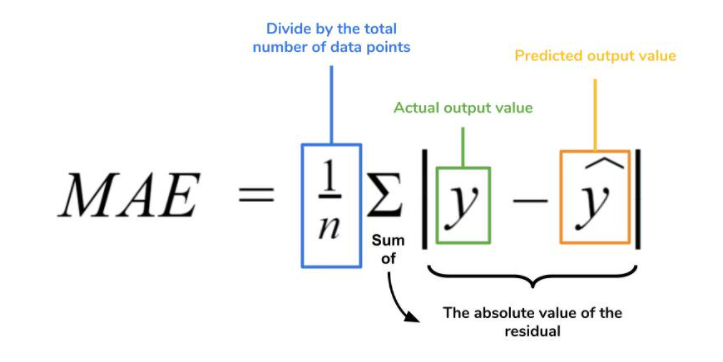

**MSE**: Mean Squared Error
- Parabolic graph -> differentiable graph at all the points
- Advantage: Converges fast
- Disadvantage: Not robust to outlayers, No longer in the same unit.
  
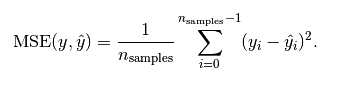

**RMSE**: Root Mean Square Error
- Same unit
- Differentiable
- Not robust to outlayers

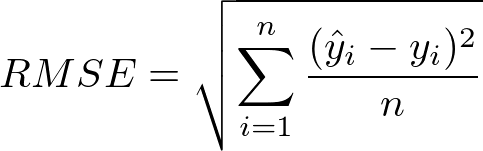

**Adjusted R^2**: 
- When input columns increases -> R^2 increases -> as the input columns increases the variance explanation becomes easy
- Use when:
  1. operating on huge columns
  2. there are irrelevant columns related to the output

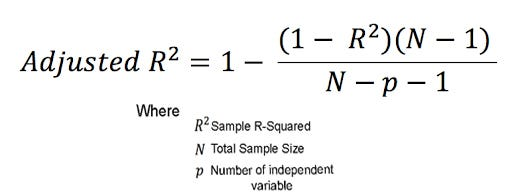

In [274]:
# Let's try the RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = California_df.drop('target',axis=1)
y = California_df['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Initiate RandomForestRegressor model
model = RandomForestRegressor().fit(X_train,y_train);

In [275]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(y_test,y_preds)

mae # This implies on an average the predicated value is mae error away from actual value 

0.32659871732073664

In [276]:
df = pd.DataFrame(data={'Actual Values':y_test,
                       'Predicted Values':y_preds})
df['difference'] = df['Predicted Values']-df['Actual Values']
df

,Actual Values,Predicted Values,difference
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
...,...,...,...
15362,2.63300,2.220380,-0.412620
16623,2.66800,1.947760,-0.720240
18086,5.00001,4.836378,-0.163632
2144,0.72300,0.717820,-0.005180


In [277]:
# Mean Squared Error

from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_test,y_preds)

mse

0.2534678520824551

#### 4.2.3 Using the `scoring` parameter


In [280]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [284]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [285]:
# Cross validation accuracy
print(f'The cross-validation accuracy is:{np.mean(cv_acc)*100:2f}%')

The cross-validation accuracy is:82.480874%


In [292]:
# accuracy 
np.random.seed(42)
cv_acc = cross_val_score(clf,X,y,cv=5,scoring='accuracy')
print(f'The cross-validation accuracy is:{np.mean(cv_acc)*100:2f}%')

The cross-validation accuracy is:82.480874%


In [293]:
# precision
np.random.seed(42)
cv_precision = cross_val_score(clf,X,y,cv=5,scoring='precision')
np.mean(cv_precision)

0.8329547346025924

In [294]:
#recall
np.random.seed(42)
cv_recall = cross_val_score(clf,X,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8545454545454545

In [295]:
#f1
np.random.seed(42)
cv_f1 = cross_val_score(clf,X,y,cv=5,scoring='f1')
np.mean(cv_f1)

0.8426854603423346

In [296]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
X = California_df.drop('target',axis=1)
y = California_df['target']

# Initiate Ridge model
model = Ridge()

In [299]:
# by default model.score has scoring = r2
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=5,scoring=None)
cv_r2

array([0.54878594, 0.46817341, 0.55078466, 0.53693584, 0.66053068])

In [300]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=5,scoring='r2')
cv_r2

array([0.54878594, 0.46817341, 0.55078466, 0.53693584, 0.66053068])

In [301]:
np.random.seed(42)
cv_r2 = cross_val_score(model,X,y,cv=5,scoring=None)
np.mean(cv_r2)

0.5530421056932167

In [303]:
# MAE
cv_mae = cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
cv_mae

array([-0.54601493, -0.56619108, -0.57654947, -0.53195065, -0.51684182])

In [304]:
# MSE
cv_mse = cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error')
cv_mse

array([-0.48472674, -0.6225366 , -0.64621002, -0.54325965, -0.49466062])

In [306]:
np.mean(cv_mse)

-0.5582787258685611

#### 4.3 Using different evaluation metrics as Scikit-Learn functions
**Classification evaluation functions**

In [324]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop('target',axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,y_train)

# Make predictions
y_preds = clf.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test,y_preds)*100:2f}%')
print(f'Precision: {precision_score(y_test,y_preds)*100:2f}%')
print(f'Recall: {recall_score(y_test,y_preds)*100:2f}%')
print(f'F1: {f1_score(y_test,y_preds)*100:2f}%')

Accuracy: 85.245902%
Precision: 84.848485%
Recall: 87.500000%
F1: 86.153846%


**Regression Evaluation Functions**

In [326]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = California_df.drop('target',axis=1)
y = California_df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,y_train)

# Make predictions
y_preds = model.predict(X_test)

print(f'R^2: {r2_score(y_test,y_preds)*100:2f}%')
print(f'MAE: {mean_absolute_error(y_test,y_preds)*100:2f}%')
print(f'MSE: {mean_squared_error(y_test,y_preds)*100:2f}%')

R^2: 80.657348%
MAE: 32.659872%
MSE: 25.346785%


### 5. Improving the machine learning model
```
First predictions = BaseLine Model
First model = BaseLine Model

- From a data perspective:
Could we collect more data? (Generally, the more data, the better)
Could we improve our data?

- From model perspective:
Is there a better model we can use?
Can we improve the current model?
```

**Parameters**: Model find these patterns in data

**HyperParameters**: Setting on a model you can adjust to (potentially) improves it's ability to find patterns 

- Three ways to adjust hyperparameters:
  1. By hand
  2. Randomly with RandomSearchCV
  3. Exhaustively with GridSearchCV

In [327]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [329]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1 Tuning hyperparameters by hand

Let's make three sets: training, validation and test

!['hparam.png'](hparam.png)

In [330]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust:

- `max_depth`
- `max_features`
- `min_samples_leaf`
- `min_samples_split`
- `n_estimators`

In [332]:
def evaluate_preds(y_true, y_preds):
    '''
        Performs evaluation comparison on y_true labels vs. y_preds labels
    '''
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)

    metric_dict = {'accuracy':round(accuracy,2),
                  'precision':round(precision,2),
                  'recall':round(recall,2),
                  'f1':round(f1,2)}
    
    print(f'Accuracy: {accuracy*100:2f}%')
    print(f'Precision: {precision*100:2f}%')
    print(f'Recall: {recall*100:2f}%')
    print(f'F1: {f1*100:2f}%')
    return metric_dict

In [351]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split X and y
X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split the data into train, validation and test sets
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split+0.15*len(heart_disease_shuffled)) # 15% of the data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

clf = RandomForestClassifier()

clf.fit(X_train,y_train)

# Make baseline predictions
y_preds = clf.predict(X_valid)

# Evaluation
baseline_metrics = evaluate_preds(y_valid,y_preds)

Accuracy: 82.222222%
Precision: 81.481481%
Recall: 88.000000%
F1: 84.615385%


In [352]:
len(X_train), len(X_valid), len(X_test)

(212, 45, 46)

In [353]:
# Create a second classifier with different hyperparameters

np.random.seed(42)

clf2 = RandomForestClassifier(n_estimators=20)
clf2.fit(X_train,y_train)

# Make predictions
y_preds2 = clf2.predict(X_valid)

# Evaluate the second classifier
clf2_metrics = evaluate_preds(y_valid,y_preds2)

Accuracy: 80.000000%
Precision: 80.769231%
Recall: 84.000000%
F1: 82.352941%


In [354]:
np.random.seed(42)

clf3 = RandomForestClassifier(max_depth=10)
clf3.fit(X_train,y_train)

# Make predictions
y_preds3 = clf3.predict(X_valid)

# Evaluate the second classifier
clf3_metrics = evaluate_preds(y_valid,y_preds3)

Accuracy: 80.000000%
Precision: 80.769231%
Recall: 84.000000%
F1: 82.352941%


#### 5.2 Tuning hyperparameters with RandomizedSearchCV

In [367]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':[10,100,200,500,1000,1200],
        'max_depth':[None,5,10,20,30],
        'max_features':['auto','sqrt'],
        'min_samples_split':[2,4,6],
        'min_samples_leaf':[1,2,4]
       }
np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # How much of computer processor you are gonna give to the model

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid,
                           n_iter=10, # the number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,y_train); # -> RandomizedSearchCV automatically creates validation set

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [368]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [369]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluation of the prediction
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.967213%
Precision: 77.419355%
Recall: 85.714286%
F1: 81.355932%


#### 5.3 Tuning hyperparameters with GridSearchCV

In [371]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [374]:
6*5*2*3*3 # It would try all the parameters -> all PnC

540

In [375]:
grid2 = {
 'n_estimators': [500, 100, 200],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]
}

In [380]:
# Now we have combination = 3*1*2*1*2*5 = 60 -> last 5 is cv = 5 -> It's 60 vs 540

In [379]:
from sklearn.model_selection import GridSearchCV

grid2 = {
 'n_estimators': [500, 100, 200],
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]
}
np.random.seed(42)

# Split into X and y
X = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1) # How much of computer processor you are gonna give to the model

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf, param_grid=grid2,
                      cv=5,
                      verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train,y_train); # -> RandomizedSearchCV automatically creates validation set

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=500; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [381]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 500}

In [383]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(X_test)

# Evaluation of the prediction
gs_metrics = evaluate_preds(y_test,gs_y_preds)

Accuracy: 81.967213%
Precision: 77.419355%
Recall: 85.714286%
F1: 81.355932%


Let's compare our different models metrics.

In [386]:
compare_metrics = pd.DataFrame({'baseline':baseline_metrics,
                              'clf_2':clf2_metrics,
                              'random search':rs_metrics,
                              'grid search':gs_metrics})
compare_metrics

,baseline,clf_2,random search,grid search
accuracy,0.82,0.80,0.82,0.82
precision,0.81,0.81,0.77,0.77
recall,0.88,0.84,0.86,0.86
f1,0.85,0.82,0.81,0.81


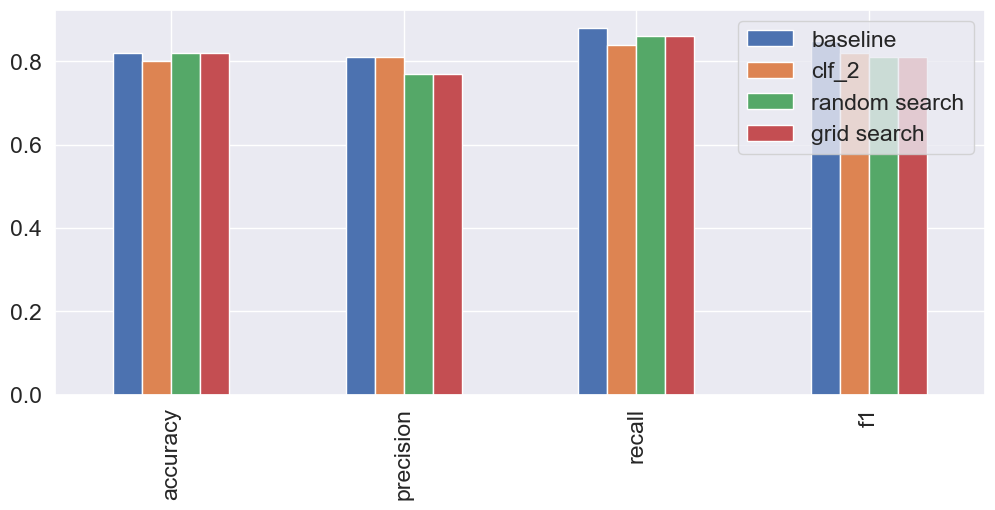

In [391]:
compare_metrics.plot.bar(figsize=(12,5));

### 6. Saving and loading trained machine learning models
Two ways to save and load machine learning models:
1. With Python's `pickle` module
2. With the `joblib` module

**pickle**

In [393]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf,open('gs_random_forest_model.pkl','wb'))

In [394]:
# Load a saved model
loaded_pickle_model = pickle.load(open('gs_random_forest_model.pkl','rb'))

In [396]:
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds);

Accuracy: 81.967213%
Precision: 77.419355%
Recall: 85.714286%
F1: 81.355932%


**joblib**

In [397]:
from joblib import dump,load

# Save model to file
dump(gs_clf,filename='gs_random_forest_joblib.joblib')

['gs_random_forest_joblib.joblib']

In [398]:
# Import a saved joblib model
loaded_joblib_model = load(filename='gs_random_forest_joblib.joblib')

In [400]:
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds);

Accuracy: 81.967213%
Precision: 77.419355%
Recall: 85.714286%
F1: 81.355932%


### 7. Putting it all together!!

In [401]:
data = pd.read_csv('car_sales_missing_data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [402]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [403]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

##### Steps we want to do (all in one cell)
1. Fill missing data
2. Convert data to numbers
3. Build a model on the data

In [ ]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv('car_sales_missing_data.csv')
data = data.dropna(subset=['Price'])

# Define different features and transform pipeline
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])
door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))
])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

# Setup the preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',categorical_transformer,categorical_features),
        ('door',door_transformer,door_feature),
        ('num',numeric_transformer,numeric_features),
    ]
)

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor',preprocessor),
                       ('model',RandomForestRegressor())
                       ])

# Split the data
X = data.drop('Price',axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# Fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)

It's also possible to use `GridSearchCV` or `RandomSearchCV` with our `pipeline` 